## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 on="Mouse ID")

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
mouse_count = combined_data_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data_df[["Mouse ID", "Timepoint"]].value_counts()
duplicate_mouse

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [6]:
#check to see if duplicate data has been dropped
duplicate_mouse_df = clean_data_df.loc[clean_data_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
# Check the number of mice in the clean DataFrame.
mouse_count = clean_data_df["Mouse ID"].count()
mouse_count

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#groupby
drug_grouped = clean_data_df.groupby(["Drug Regimen"])
#mean
tumor_mean = drug_grouped["Tumor Volume (mm3)"].mean()
#median
tumor_median = drug_grouped["Tumor Volume (mm3)"].median()
#variance
tumor_variance = drug_grouped["Tumor Volume (mm3)"].var()
#standard deviation
tumor_std = drug_grouped["Tumor Volume (mm3)"].std()
#SEM
tumor_sem = drug_grouped["Tumor Volume (mm3)"].sem()

#summary table
summary_stats = pd.DataFrame({"Mean": tumor_mean, 
                              "Median":tumor_median, 
                              "Variance":tumor_variance, 
                              "Standard Deviation": tumor_std, 
                              "SEM": tumor_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#groupby drug regimen
group_by_agg = clean_data_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = group_by_agg.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_table_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

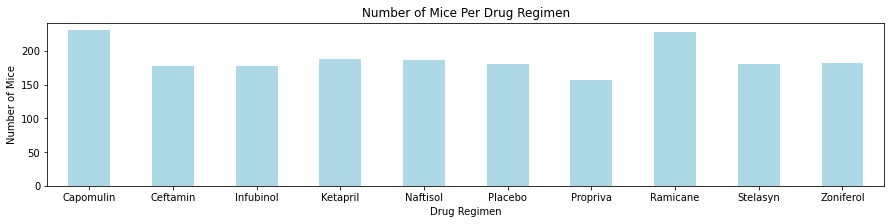

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
totalmice_perdrug = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
totalmice_perdrug

#pandas bar plot with labels/size/color/rotation
totalmice_perdrug.plot.bar(xlabel="Drug Regimen", 
                           ylabel="Number of Mice", 
                           title="Number of Mice Per Drug Regimen", 
                           figsize=(15, 3), 
                           color="lightblue", 
                           rot=0)

plt.show()

In [11]:
#sort drugs
sorted_drugs = clean_data_df.sort_values(by='Drug Regimen', ascending=True,)

#grab unique drugs and put into list
drugs = (sorted_drugs["Drug Regimen"].unique()).tolist()

#show drug list
print(drugs)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [12]:
#get number of mice and put into list
mice = (clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

#show mice list
mice

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

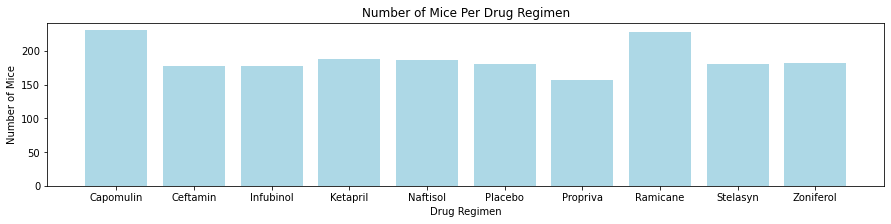

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(15,3))
plt.bar(drugs, mice, color="lightblue")

#title bar chart
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#show bar chart
plt.show()

In [14]:
unique_sex = clean_data_df["Sex"].unique()

total_mice = clean_data_df["Mouse ID"].nunique()

total_female = clean_data_df.loc[clean_data_df['Sex']=='Female',:].nunique().iloc[0]

total_male = clean_data_df.loc[clean_data_df['Sex']=='Male',:].nunique().iloc[0]

perc_male = (total_male/total_mice) * 100

perc_female = (total_female/total_mice) * 100

gender_stats_df = pd.DataFrame({"Sex": unique_sex,
                             "Total Count": [total_male, total_female],
                             "Distribution": [perc_male, perc_female]
                            })
gender_stats_df

,Sex,Total Count,Distribution
0,Male,125,50.200803
1,Female,124,49.799197


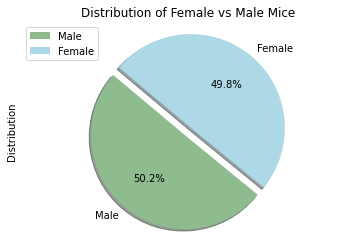

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ("Male", "Female")
explode = (0.1,0)
colors = ("darkseagreen", "lightblue")

#pie chart
gender_stats_df.plot.pie(y='Distribution', title='Distribution of Female vs Male Mice', labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#show pie chart
plt.show()

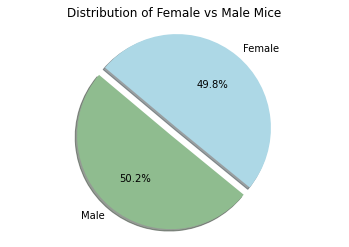

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#data for pie chart
labels = ("Male", "Female")
explode = (0.1,0)
colors = ("darkseagreen", "lightblue")
gender_data = gender_stats_df['Distribution']

#pie chart
plt.pie(gender_data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#title
plt.title('Distribution of Female vs Male Mice')

# create axes which are equal so we have a perfect circle
plt.axis("equal")

#show pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
removed_columns_df = clean_data_df[["Mouse ID", "Timepoint", "Drug Regimen",
                            "Tumor Volume (mm3)"]]
removed_columns_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,0,Ramicane,45.000000
1,k403,5,Ramicane,38.825898
2,k403,10,Ramicane,35.014271
3,k403,15,Ramicane,34.223992
4,k403,20,Ramicane,32.997729


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
certain_drugs = removed_columns_df.loc[(removed_columns_df['Drug Regimen']=='Capomulin') | 
                                  (removed_columns_df['Drug Regimen']=='Ramicane') | 
                                  (removed_columns_df['Drug Regimen']=='Infubinol') | 
                                  (removed_columns_df['Drug Regimen']=='Ceftamin'), :]
certain_drugs

# Start by getting the last (greatest) timepoint for each mouse
groupby_timepoint_df = removed_columns_df.groupby(["Mouse ID"]).max()
groupby_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_drug_df = pd.merge(groupby_timepoint_df, certain_drugs, on=["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"])
combined_drug_df


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a577,30,Infubinol,57.031862
4,a685,45,Infubinol,66.083066
5,b447,0,Ceftamin,45.000000
6,b487,25,Ceftamin,56.057749
7,b759,30,Ceftamin,55.742829
8,c139,45,Infubinol,72.226731
9,c895,30,Infubinol,60.969711


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
